<a href="https://colab.research.google.com/github/YounSooKimTech/Bamboo_Project/blob/main/Accuracy_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_origin = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Bamboo_Project/refs/heads/main/directors_1996_2016_gvkey_ethnicity.csv")

df_predict = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Bamboo_Project/refs/heads/main/predicted_ethnicities.csv")



## Original Data's Ethinicity

In [ ]:
df_origin["ethnicity"].value_counts()

,count
ethnicity,
Caucasian,18965
Unknown,15358
African-American,622
Asian,553
Hispanic,333
Indian,65
Middle-Eastern,33
Other,14
Native American,3


In [ ]:
broad_ethnic_map = {
    "Caucasian": "White",
    "Unknown": "Other",
    "African-American": "Black",
    "Asian": "East Asian",
    "Hispanic": "Other",
    "Indian": "South Asian",
    "Middle-Eastern": "Other",
    "Other": "Other",
    "Native American": "Other"
}

df_origin['Ethinicity_Origin'] = df_origin['ethnicity'].map(broad_ethnic_map)


In [ ]:
df_origin["Ethinicity_Origin"].value_counts()

,count
Ethinicity_Origin,
White,18965
Other,15741
Black,622
East Asian,553
South Asian,65


In [ ]:
## Name Ethnicity Classifier's predicted ethnicity

In [ ]:
df_predict["predictions"] = df_predict["predictions"].str.capitalize()
df_predict["predictions"].value_counts()

,count
predictions,
British,16370
Else,6901
German,2915
Danish,2034
Dutch,1542
French,1426
Italian,885
Swedish,792
Zimbabwean,474


In [ ]:
ethnic_group_map = {
    "British": "White",
    "Norwegian": "White",
    "Indian": "South Asian",
    "Hungarian": "White",
    "Spanish": "White",
    "German": "White",
    "Zimbabwean": "Black",
    "Portuguese": "White",
    "Polish": "White",
    "Bulgarian": "White",
    "Bangladeshi": "South Asian",
    "Turkish": "Others",
    "Belgian": "White",
    "Pakistani": "South Asian",
    "Italian": "White",
    "Romanian": "White",
    "Lithuanian": "White",
    "French": "White",
    "Chinese": "East Asian",
    "Swedish": "White",
    "Nigerian": "Black",
    "Greek": "White",
    "South African": "Black",
    "Japanese": "East Asian",
    "Dutch": "White",
    "Danish": "White",
    "Russian": "White",
    "Filipino": "East Asian"
}

df_predict['Ethnicitiy_Predicted'] = df_predict['predictions'].map(ethnic_group_map)

df_predict

,names,predictions,confidences,Ethnicitiy_Predicted
0,JAMES E PRESTON,British,93.320,White
1,CHARLES D MILLER,British,34.509,White
2,PHILIP M NEAL,British,51.379,White
3,PETER W. MULLIN,British,33.678,White
4,RICHARD M FERRY,British,88.915,White
...,...,...,...,...
36177,KRISTEN O'HARA,Danish,44.339,White
36178,KENNETH SLUTSKY,Else,33.352,NaN
36179,LINDA YACCARINO,Italian,49.140,White
36180,GERALD CHIZEVER,Zimbabwean,77.023,Black


In [ ]:
df_predict["confidences"].describe()

,confidences
count,36182.000000
mean,57.075790
std,21.618404
min,10.673000
25%,39.200250
50%,55.274500
75%,74.714250
max,99.998000


In [ ]:
# Filtering the dataset based on confidence greater than 80
df_filtered = df_predict[df_predict['confidences'] > 75]

# Keeping only rows where Ethnicitiy_Predicted is White, Black, East Asian, or South Asian
categories_to_keep = ['White', 'Black', 'East Asian', 'South Asian']
df_filtered = df_filtered[df_filtered['Ethnicitiy_Predicted'].isin(categories_to_keep)]

df_filtered

,names,predictions,confidences,Ethnicitiy_Predicted
0,JAMES E PRESTON,British,93.320,White
4,RICHARD M FERRY,British,88.915,White
11,CHARLES K GIFFORD,British,77.433,White
13,PAUL W CHELLGREN,Swedish,87.391,White
31,ALAN ROSSKAMM,German,88.430,White
...,...,...,...,...
36169,WILLIAM PENCE,British,79.691,White
36172,SAGAR PATEL,Indian,92.109,South Asian
36174,ALAN LOWE,British,93.583,White
36176,CAMILLO PANE,Italian,93.835,White


In [ ]:
df_filtered["Ethnicitiy_Predicted"].value_counts()

,count
Ethnicitiy_Predicted,
White,7066
East Asian,256
South Asian,186
Black,124


## Merge the two dataset to calculate accuracy

In [ ]:
df_merged = df_origin.merge(df_filtered, left_on="fullname", right_on="names", how="left")

excluded_values = ["Unknown", "Other"]  # List of values to exclude
df_merged = df_merged[~df_merged['Ethinicity_Origin'].isin(excluded_values)]

#df_merged = df_merged.dropna()

df_merged

,dirid,fullname,ethnicity,Ethinicity_Origin,names,predictions,confidences,Ethnicitiy_Predicted
0,1.0,JAMES E PRESTON,Caucasian,White,JAMES E PRESTON,British,93.320,White
2,3.0,PHILIP M NEAL,Caucasian,White,NaN,NaN,NaN,NaN
3,4.0,PETER W. MULLIN,Caucasian,White,NaN,NaN,NaN,NaN
4,5.0,RICHARD M FERRY,Caucasian,White,RICHARD M FERRY,British,88.915,White
5,6.0,GEORGE A SISSEL,Caucasian,White,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
36177,274771.0,KRISTEN O'HARA,Caucasian,White,NaN,NaN,NaN,NaN
36178,274775.0,KENNETH SLUTSKY,Caucasian,White,NaN,NaN,NaN,NaN
36179,276441.0,LINDA YACCARINO,Caucasian,White,NaN,NaN,NaN,NaN
36180,277023.0,GERALD CHIZEVER,Caucasian,White,GERALD CHIZEVER,Zimbabwean,77.023,Black


In [ ]:
df_merged["Ethinicity_Origin"].value_counts()

,count
Ethinicity_Origin,
White,18965
Black,622
East Asian,553
South Asian,65


In [ ]:
df_merged[["fullname", "Ethinicity_Origin", "Ethnicitiy_Predicted"]]


,fullname,Ethinicity_Origin,Ethnicitiy_Predicted
0,JAMES E PRESTON,White,White
2,PHILIP M NEAL,White,NaN
3,PETER W. MULLIN,White,NaN
4,RICHARD M FERRY,White,White
5,GEORGE A SISSEL,White,NaN
...,...,...,...
36177,KRISTEN O'HARA,White,NaN
36178,KENNETH SLUTSKY,White,NaN
36179,LINDA YACCARINO,White,NaN
36180,GERALD CHIZEVER,White,Black


In [ ]:
correct_predictions = df_merged[df_merged['Ethinicity_Origin'] == df_merged['Ethnicitiy_Predicted']]

# Count the total correct classifications
total_correct = correct_predictions.shape[0]

# Calculate accuracy
accuracy = (total_correct / df_merged.shape[0]) * 100

# Display summary
summary = {
    "Total Records": df_merged.shape[0],
    "Correctly Classified": total_correct,
    "Accuracy (%)": accuracy
}

summary



{'Total Records': 20441,
 'Correctly Classified': 3984,
 'Accuracy (%)': 19.49024020351255}

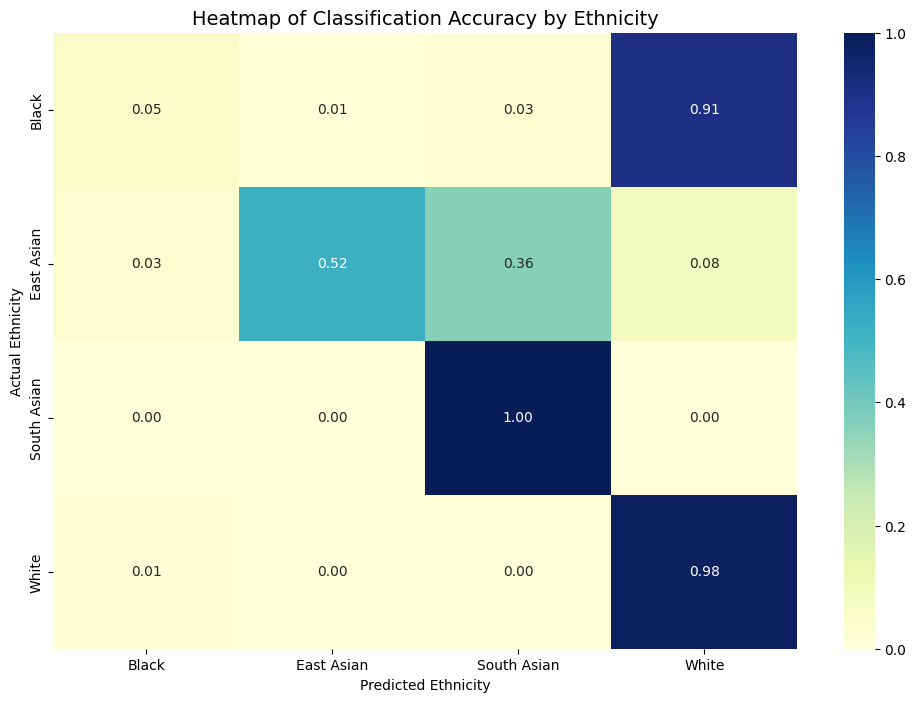

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(df_merged['Ethinicity_Origin'], df_merged['Ethnicitiy_Predicted'], normalize='index')

    # Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Heatmap of Classification Accuracy by Ethnicity", fontsize=14)
plt.xlabel("Predicted Ethnicity")
plt.ylabel("Actual Ethnicity")
plt.show()
